<div id="container" style="position:relative;">
<div style="float:left"><h1>  Capstone Projects EDA - William Nankap </h1></div>
<div style="position:relative; float:right"><img style="height:65px" src ="https://drive.google.com/uc?export=view&id=1EnB0x-fdqMp6I5iMoEBBEuxB_s7AmE2k" />
</div>
</div>

# NLP ClassifyChat

An innovative text classification project based on natural language processing. It leverages conversations from the freeCodeCamp chat to provide an accurate and efficient solution for automatically categorizing messages and extracting relevant information from large volumes of textual data.

### **`Notebook 2: Preprocessing Data`**

### **`Author: William Nankap`**

Work plan: https://docs.google.com/presentation/d/10xtITocBaQgZYtDw1yWe_FzQPgR7Je6EkNRv8IJVCPM/edit?usp=sharing


-----

# Table of Contents

- ### Introduction
- ### 1. Data Loading
- ### 2. Data Preprocessing
    - ### Remove user mentions
    - ### Emoticon management
    - ### Remove link
    - ### Removing special characters, Deleting stopwords, Spelling correction & Lemmatization
- ### Save the preprocessed data
- ### Conclusion

-----

# Introduction

In this notebook, we'll focus on pre-processing text data to prepare it for our NLP analysis. Pre-processing text data is a crucial step that will enable us to obtain clean, normalized data, ready for use in our machine learning models.

We'll start by exploring the unique features of the text data we've extracted from the freeCodeCamp chat. This will include understanding the sentence structures, keywords and linguistic peculiarities specific to our corpus.

Next, we'll review the main techniques for pre-processing text data, such as special character removal, lower-casing, stop word removal and lemmatization. We will also implement standardization techniques such as extra-space removal, spelling correction and abbreviation management.

Finally, we will evaluate the quality and effectiveness of our pre-processing by carrying out exploratory analyses on the textual data after the process. We will examine word distribution, term frequency, and other relevant measures to assess the impact of our preprocessing on the quality of the textual data.

Preprocessing text data is a crucial step in ensuring accurate and reliable results in our NLP analysis. This notebook will enable us to implement the techniques needed to prepare our text data in the best possible way, so that we can make the most of our machine learning model later on.

In [1]:
# We import all the librairies need for exploration, visualization and modeling

import pandas as pd
import numpy as np

#Preprocessing & Tokenization
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from gensim.models import Word2Vec as w2v
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

import string
import re

# plotting
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

from scipy import stats
from statsmodels.stats import multicomp
from scipy.stats import pearsonr
import statsmodels.api as sm

import emoji

In [33]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/williamnankap/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/williamnankap/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/williamnankap/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [34]:
nltk.download('omw-1.4')


[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/williamnankap/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

# 1. Data Loading

In the previous notebook, we cleaned up the initial dataset to obtain a clean dataset. We'll use this cleaned version to continue our work.

In [2]:
#Loading my clean file
clean_freecodecamp_casual = pd.read_csv('clean_freecodecamp_casual.csv')

In [3]:
#Sanity check
clean_freecodecamp_casual.head(3)

,fromUser.gv,fromUser.removed,fromUser.staff,fromUser.username,fromUser.v,issues,mentions,readBy,sent,text,unread,urls,v
0,0,0,0,sircharleswatson,1.0,[],[],22,2014-12-31 23:01:35.647000+00:00,no legumes either,False,[],1
1,0,0,0,sircharleswatson,1.0,[],"[{'userIds': [], 'userId': '54a47e0cdb8155e670...",22,2014-12-31 23:03:20.182000+00:00,@janetwalters008 It is. but it works. some peo...,False,[],1
2,0,0,0,phgilliam,1.0,[],[],22,2014-12-31 23:03:38.388000+00:00,They guy that came up with the idea is kind of...,False,[],1


In [4]:
#Convert sent column from object to datetime
clean_freecodecamp_casual['sent'] = pd.to_datetime(clean_freecodecamp_casual['sent'])

In [6]:
#Info
clean_freecodecamp_casual.shape
print(f'This file have {clean_freecodecamp_casual.shape[0]} rows & {clean_freecodecamp_casual.shape[1]} columns')

This file have 5005738 rows & 13 columns


# 2. Data Preprocessing

Our pre-processing process will focus only on our text column.


In [8]:
#Overview of 10 sample
clean_freecodecamp_casual['text'].sample(10)

3056646                                       @apottr :joy: 
591764                                   @brainyfarm  bye :)
268506                                In the console as well
4345503                                welcome  @ayushsmith 
3281147              It wasn't me I swear it was camper both
4655805                                              wtf lol
1571509    i believe setGear should just make it the chan...
4927481    @PenguinOfTheSky yeah, but nowdays webkit-brow...
3479680                                                   no
3643859                                          me irl: :'(
Name: text, dtype: object

-----

**Looking at the messages in our text column, here are a few observations:**

- Some messages appear to be interactions between users, such as "sayedafif sends brownie points to @lydatech", suggesting a reward or recognition feature between users.

- Some messages are linked to specific events, such as "happy new year guys :smile:", indicating a discussion around the new year.

- There are messages that don't appear to have much textual content, such as "it was hidden" or "js\n\n", which may require special attention when pre-processing the data.

- Some messages contain emoticons, such as ":blush:" and ":smile:", which can add an emotional dimension to conversations.

- There are messages that refer to other users, such as "@mstellaluna" and "@Tuezday", indicating specific interactions between users.

- Some messages contain informal expressions or humor, such as "lol, not at all, but ill take it :blush:" and "i am pretty darn sure :pensive:", adding a touch of personality to conversations.

- Some messages contain link

These observations highlight the diversity of content and features present in text column messages, which will require a tailored approach during pre-processing and subsequent NLP analysis.

----- 

**Based on our observations of the text column messages, here are some suggestions for the pre-processing process:**

- **Remove user mentions:** As we've noticed that some messages refer to other users with "@" symbols, it may be appropriate to remove these mentions to reduce the noise and concentrate on the content of the message itself.

- **Emoticon management:** Emoticons can add an emotional dimension to messages. Depending on the purpose of our analysis, we may decide to keep them as such or convert them into equivalent text representations. For example, ":smile:" could be converted to "smile" or "happy".

- **Removing special characters:** Some messages contain special characters such as "```" or code symbols. It's a good idea to remove these to clean up the data and eliminate non-informative elements.

- **Deleting stopwords:** Stopwords are common words such as "the", "of", "but" that don't carry any specific meaning in the context of the analysis. We could consider deleting them to reduce the number of words and concentrate on more significant terms.

- **Spelling correction:** If we have identified spelling errors in the messages, we could consider applying spelling correction techniques to improve the consistency and quality of the textual data.

- **Lemmatization:** To standardize words and group together different forms of the same word, we could use lemmatization. This would enable us to obtain canonical forms of words and simplify subsequent analysis.

These suggestions are based on the specific features we observed in the messages in the text column.

## Remove user mentions

Observations on the user mentions removal step:

- **Noise reduction:** By removing user mentions, we eliminate specific references to other users, which can reduce noise in the data and allow us to focus more on the general content of messages.

- **Privacy protection:** Removing user mentions also helps to protect users' privacy by preventing their identities from being revealed in subsequent analysis.

- **Data consistency:** Deleting user mentions can contribute to data consistency by eliminating elements specific to each user, facilitating comparative or general analyses across the entire corpus of data.

- **Impact on subsequent analyses:** We will delete the users present in the text corpus, but we will add a new column for them.

**Note: we have a mentions column that contains only the ids of these users. But retrieving their names directly from the message corpus will facilitate our analysis of this information.**

To pre-process this element, we will:
- retrieve the list of mentions and assign it to another column
- know the number of users mentioned for further analysis
- remove these mentions from our text corpus

In [11]:
def remove_tag_text(text):
    """
    Extracts user mentions (tags) from the given text.
    
    Parameters:
    text (str): The text containing user mentions (tags).
    
    Returns:
    list: A list of user mentions (tags) found in the text.
    """
    
    tag = re.findall(r"@\w+", text)
    
    return tag

def len_tag_text(text):
    '''
    Counts the number of user mentions (tags) in the given text.
    
    Parameters:
    text (str): The text containing user mentions (tags).
    
    Returns:
    int: The count of user mentions in the text.
    '''
    
    tag = re.findall(r"@\w+", text)
    
    return len(tag)

def clean_tag_text(text):
    '''
    Removes user mentions (tags) from the given text.
    
    Parameters:
    text (str): The text containing user mentions (tags).
    
    Returns:
    str: The text with user mentions removed.
    '''
    
    clean_tag = re.sub(r"@\w+", "", text)
    
    return clean_tag

In [12]:
#Getting the list of mention user, and it in a new column
clean_freecodecamp_casual['tag'] = clean_freecodecamp_casual['text'].apply(remove_tag_text)

#Getting the lenght of mention user, and it in a new column
clean_freecodecamp_casual['n_tag'] = clean_freecodecamp_casual['text'].apply(len_tag_text)

In [13]:
#Sanity check
clean_freecodecamp_casual.sample(3)

,fromUser.gv,fromUser.removed,fromUser.staff,fromUser.username,fromUser.v,issues,mentions,readBy,sent,text,unread,urls,v,tag,n_tag
2171398,0,0,0,anthonygallina1,354.0,[],"[{'userIds': [], 'userId': '55cb2c950fc9f982be...",31,2016-07-29 08:11:06.954000+00:00,@codemzy Hi you ok?,False,[],1,[@codemzy],1
3669452,0,0,0,hmolette,8.0,[],"[{'userIds': [], 'screenName': 'coymeetsworld'...",15,2017-03-23 22:09:19.634000+00:00,@coymeetsworld it's called emotional inteligen...,False,[],1,[@coymeetsworld],1
4378467,1,0,0,mstellaluna,1402.0,[],"[{'userIds': [], 'screenName': 'breese8009', '...",11,2017-06-25 17:21:08.874000+00:00,"@breese8009 yo cali , right on time",False,[],1,[@breese8009],1


**We've successfully retrieved the information that's important to us from our text corpus, now we can clean it up.**

In [14]:
#Apply cleaning function to remove user mention
clean_freecodecamp_casual['text'] = clean_freecodecamp_casual['text'].apply(clean_tag_text)

In [18]:
#Sanity check
clean_freecodecamp_casual.sample(3)

,fromUser.gv,fromUser.removed,fromUser.staff,fromUser.username,fromUser.v,issues,mentions,readBy,sent,text,unread,urls,v,tag,n_tag
1126287,0,0,0,JasonDeving,6.0,[],[],48,2016-02-13 08:09:07.672000+00:00,lols,False,[],1,[],0
978062,0,0,0,eeflores,3.0,[],"[{'userIds': [], 'userId': '568e044616b6c7089c...",71,2016-01-20 12:08:58.125000+00:00,you can just do `slice(1)`,False,[],1,[@RakshithNM],1
1092155,0,0,0,JasonDeving,6.0,[],[],51,2016-02-08 02:20:13.178000+00:00,i passed that one lols,False,[],1,[],0


**We have successfully cleaned up the mentions of present users in our text corpus.**

## Emoticon management

Emoticons are present in the text messages, such as ":smile:", which add an emotional dimension to the messages.

Getting emoticons into text representations may simplify further natural language processing (NLP) tasks, such as sentiment analysis or topic modeling, by treating emoticons as words with specific meanings.

However, it is crucial to note that emoticon management should align with the goals of our analysis and the expectations of the target audience or application where the processed text will be used.

To pre-process this element, we will:
- retrieve the list of emoticons and assign it to another column
- know the number of emoticons used for further analysis
- remove these emoticons from our text corpus

In [20]:
def remove_emoji_text(text):
    '''
    Retrieves emojis from the given text.
    
    Parameters:
    text (str): The text containing emojis.
    
    Returns:
    list: A list of emojis found in the text.
    '''
    
    tag = re.findall(r"(?i)(?::|;|=)(?:-)?(?:\)|\(|[a-z])+", text)
    
    return tag

def len_emoji_text(text):
    '''
    Retrieves the count of emojis in the given text.
    
    Parameters:
    text (str): The text containing emojis.
    
    Returns:
    int: The count of emojis in the text.
    '''
    
    tag = re.findall(r"(?i)(?::|;|=)(?:-)?(?:\)|\(|[a-z])+", text)
    
    return len(tag)

def clean_emoji_text(text):
    '''
    Removes emojis from the given text.
    
    Parameters:
    text (str): The text containing emojis.
    
    Returns:
    str: The text with emojis removed.
    '''
    
    tag = re.sub(r"(?i)(?::|;|=)(?:-)?(?:\)|\(|[a-z])+", "", text)
    
    return tag

In [21]:
#Getting the list of emoticon, and it in a new column
clean_freecodecamp_casual['emoji'] = clean_freecodecamp_casual['text'].apply(remove_emoji_text)

#Getting the lenght of emoticon number, and it in a new column
clean_freecodecamp_casual['n_emoji'] = clean_freecodecamp_casual['text'].apply(len_emoji_text)

In [22]:
#Sanity check
clean_freecodecamp_casual.sample(3)

,fromUser.gv,fromUser.removed,fromUser.staff,fromUser.username,fromUser.v,issues,mentions,readBy,sent,text,unread,urls,v,tag,n_tag,emoji,n_emoji
2702928,0,0,0,aaronstmour,6.0,[],[],23,2016-11-01 05:58:34.840000+00:00,"yeah, in the css part",False,[],1,[],0,[],0
2912696,0,0,0,kvsm,6.0,[],"[{'userIds': [], 'userId': '583cb92cd73408ce4f...",26,2016-12-06 09:06:10.138000+00:00,you do need to assign something to the answer...,False,[],1,[@vaunie],1,[:smile],1
4464919,1,0,0,psyperl,21.0,[],"[{'userIds': [], 'screenName': 'JonCosta', 'us...",12,2017-07-08 02:44:15.145000+00:00,:wave:,False,[],1,[@JonCosta],1,[:wave],1


**We've successfully retrieved the information that's important to us from our text corpus, now we can clean it up.**

In [23]:
#Apply cleaning function to remove emoticon
clean_freecodecamp_casual['text'] = clean_freecodecamp_casual['text'].apply(clean_emoji_text)

In [24]:
#Sanity check
clean_freecodecamp_casual.sample(3)

,fromUser.gv,fromUser.removed,fromUser.staff,fromUser.username,fromUser.v,issues,mentions,readBy,sent,text,unread,urls,v,tag,n_tag,emoji,n_emoji
3748501,1,0,0,apottr,55.0,[],"[{'userIds': [], 'screenName': 'rahsheen', 'us...",15,2017-04-04 19:32:16.109000+00:00,it's a common situation,False,[],1,[@rahsheen],1,[],0
870420,0,0,0,camperbot,1.0,[],[],60,2016-01-05 06:15:24.804000+00:00,"> sorry mojo706, you can't send brownie points...",False,[],1,[],0,"[:sparkles, :sparkles]",2
361756,0,0,0,camperbot,1.0,[],[],23,2015-09-01 04:16:36.801000+00:00,## _right: [code formatting [wiki]](https://g...,False,[{'url': 'https://github.com/freecodecamp/free...,1,[],0,"[:point, :pencil]",2


**We have successfully cleaned up the emoticons presented in our text corpus.**

## Remove link

The presence of links or URLs in the data corpus can be considered noise or irrelevant for certain types of analysis, such as sentiment analysis or topic modeling.

Removing links or URLs from the text can help in focusing on the actual content and improve the quality of the analysis.

To pre-process this element, we will:
- retrieve the list of link and assign it to another column
- know the number of link used for further analysis
- remove these links from our text corpus

In [25]:
def remove_link_text(text):
    '''
    Retrieves the links present in the given text.
    
    Parameters:
    text (str): The text containing links.
    
    Returns:
    list: A list of links found in the text.
    '''
    
    link = re.findall(r"https?://\S+", text)
    
    return link

def len_link_text(text):
    '''
    Counts the number of links in the given text.
    
    Parameters:
    text (str): The text containing links.
    
    Returns:
    int: The number of links in the text.
    '''
    
    link = re.findall(r"https?://\S+", text)
    
    return len(link)

def clean_link_text(text):
    '''
    Removes links from the given text.
    
    Parameters:
    text (str): The text containing links.
    
    Returns:
    str: The text with links removed.
    '''
    
    clean_link = re.sub(r"https?://\S+", "", text)
    
    return clean_link

In [26]:
#Getting the list of link, and it in a new column
clean_freecodecamp_casual['link'] = clean_freecodecamp_casual['text'].apply(remove_link_text)

#Getting the lenght of link number, and it in a new column
clean_freecodecamp_casual['n_link'] = clean_freecodecamp_casual['text'].apply(len_link_text)

In [28]:
#Sanity check
clean_freecodecamp_casual.sample(3)

,fromUser.gv,fromUser.removed,fromUser.staff,fromUser.username,fromUser.v,issues,mentions,readBy,sent,text,unread,urls,v,tag,n_tag,emoji,n_emoji,link,n_link
3104607,0,0,0,xGabey,10.0,[],[],29,2017-01-06 00:53:45.376000+00:00,right,False,[],1,[],0,[],0,[],0
2462107,0,0,0,hakobtarpo,3.0,[],[],24,2016-09-21 17:27:51.525000+00:00,[![blob](https://files.gitter.im/FreeCodeCamp/...,False,[{'url': 'https://files.gitter.im/FreeCodeCamp...,1,[],0,[],0,[https://files.gitter.im/FreeCodeCamp/FreeCode...,1
4864079,1,0,0,qmikew1,80.0,[],[],5,2017-10-23 15:39:19.635000+00:00,lol,False,[],1,[],0,[],0,[],0


**We've successfully retrieved the information that's important to us from our text corpus, now we can clean it up.**

In [29]:
#Apply cleaning function to remove links
clean_freecodecamp_casual['text'] = clean_freecodecamp_casual['text'].apply(clean_link_text)

In [32]:
#Sanity check
clean_freecodecamp_casual.sample(3)

,fromUser.gv,fromUser.removed,fromUser.staff,fromUser.username,fromUser.v,issues,mentions,readBy,sent,text,unread,urls,v,tag,n_tag,emoji,n_emoji,link,n_link
2276582,0,0,0,TimHandy,9.0,[],"[{'userIds': [], 'userId': '571a440a659847a7af...",20,2016-08-18 06:52:17.505000+00:00,"yes, and id's even higher priority. \n",False,[],1,[@hangmchu],1,[],0,[],0
12391,0,0,0,serhiicss,2.0,[],[],19,2015-01-11 15:03:53.604000+00:00,May this will help you,False,[{'url': 'http://www.linuxbsdos.com/2012/05/17...,1,[],0,[],0,[http://www.linuxbsdos.com/2012/05/17/how-to-d...,1
3035174,0,0,0,faraco,18.0,[],[],25,2016-12-26 17:01:48.337000+00:00,that is messi,False,[],1,[],0,[],0,[],0


**We have successfully cleaned up the links presented in our text corpus.**

It seems that the url column already present in our initial dataset contains the same links we've just removed from our text corpus. This will be part of another in-depth analysis, for now we'll assume they're different.


## Removing special characters, Deleting stopwords, Spelling correction & Lemmatization

- Removing special characters: Some messages contain special characters like "```" or code symbols. Removing these special characters can help clean up the data and eliminate non-informative elements that may not contribute to the analysis. This step ensures that the text remains focused on the meaningful content.

- Deleting stopwords: Stopwords are common words such as "the", "of", "but" that do not carry specific meaning in the context of the analysis. Removing these stopwords can help reduce the number of words in the text and allow us to concentrate on more significant terms. By eliminating stopwords, we can potentially improve the accuracy and relevance of our analysis.

- Lemmatization: Lemmatization is a technique used to standardize words and group together different forms of the same word. By reducing words to their base or canonical forms, we can simplify the analysis and ensure that variations of a word are treated as the same entity. Lemmatization aids in improving the accuracy and effectiveness of subsequent NLP tasks, such as text classification or topic modeling.

In [35]:
def clean_text(texte):
    '''
    Cleans the input text by applying multiple preprocessing steps:
    - Conversion to lowercase
    - Removal of special characters and punctuation
    - Tokenization of the text into words
    - Removal of stop words
    - Lemmatization of words for normalization
    - Reassembly of the cleaned text
    
    Args:
        texte (str): The text to be cleaned.
    
    Returns:
        str: The cleaned text.
    '''
    
    # Convert the text to lowercase
    texte = texte.lower()

    # Remove special characters and punctuation 
    texte = re.sub(r'[^a-zA-Z]', ' ', texte)

    # Tokenization
    mots = word_tokenize(texte)

    # Delete stop words (stop words)
    mots_sans_vide = [mot for mot in mots if mot not in stopwords.words('english')]
    
    # Initialize the lemmatizer
    lemmatiseur = WordNetLemmatizer()

    # Normalize the words using lemmatization
    mots_normalises = [lemmatiseur.lemmatize(mot) for mot in mots_sans_vide]

    # Reassemble the words into a cleaned text
    clean_text = ' '.join(mots_normalises)

    return clean_text

In [36]:
#Cleaning the data corpus
clean_freecodecamp_casual['clean_text'] = clean_freecodecamp_casual['text'].apply(clean_text)

In [45]:
#Sanity check
clean_freecodecamp_casual.sample(3)

,fromUser.gv,fromUser.removed,fromUser.staff,fromUser.username,fromUser.v,issues,mentions,readBy,sent,text,unread,urls,v,tag,n_tag,emoji,n_emoji,link,n_link,clean_text
1722741,0,0,0,sludge256,28.0,[],[],16,2016-05-17 05:19:38.172000+00:00,I might have to consult the whiteboard.,False,[],1,[],0,[],0,[],0,might consult whiteboard
1583222,0,0,0,AkiraLaine,17.0,[],"[{'userIds': [], 'userId': '551b10c715522ed4b3...",63,2016-04-25 06:56:24.560000+00:00,:,False,[],1,[@benmcmahon100],1,[:punch],1,[],0,
869494,0,0,0,francisngo,0.0,[],[],65,2016-01-05 03:35:44.827000+00:00,can someone help me with github projects,False,[],1,[],0,[],0,[],0,someone help github project


**We have successfully cleaned up our text corpus. Now we'll save it in another file and then process with Vectorization and modeling**

# Save the dataset

In [40]:
#Save the main dataset
clean_freecodecamp_casual.to_csv('preprocess_clean_freecodecamp_casual.csv', index=False)

-----

# Conclusion

In conclusion, this notebook made it possible to efficiently pre-process the text corpus by applying several cleaning and normalization steps. Removing special characters, empty words and frequent non-informative words helped to reduce noise and focus on more meaningful terms. In addition, the use of lemmatization has helped to standardize words and group together different forms of the same word, which will facilitate future analyses. The text corpus is now ready to be used for more advanced analysis or modeling tasks, such as machine learning or natural language processing.

---- 

# Next Step


- ### Countvectorizer + Kmeans + LDA 
- ### TFDIF + Kmeans + LDA 
- ### BERT  
- ### WOrd2vec + Kmeans  

---- 

# BONUS. Some other EDA on my numeric column to use in the presentation

Our dataset contain:
- 7 Numeric columns
- 5 Object columns
- 1 Datetime Column

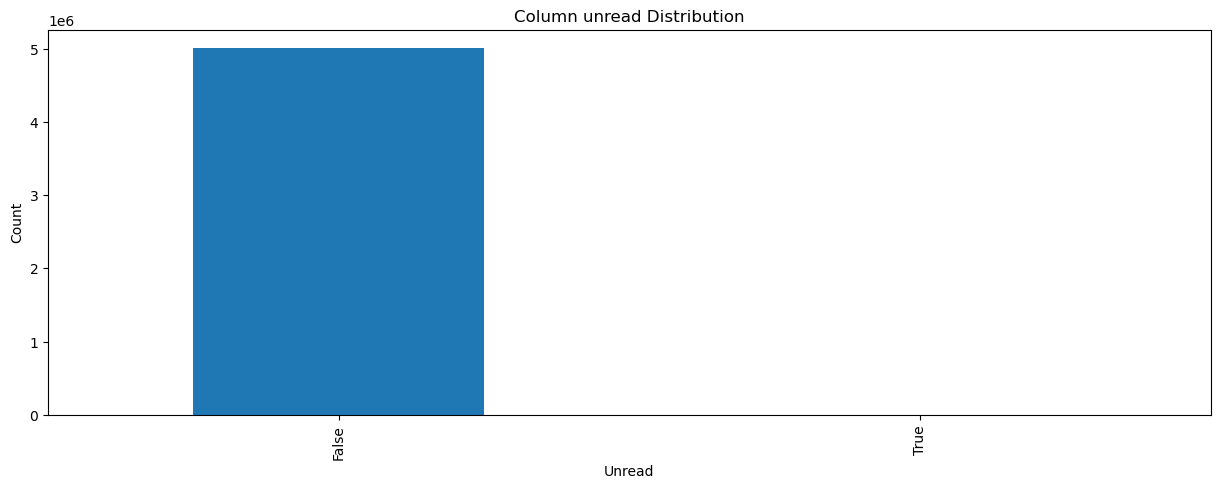

In [51]:
clean_freecodecamp_casual['unread'].value_counts().plot(kind='bar', figsize=(15, 5), legend=False)
plt.title("Column unread Distribution")
plt.ylabel("Count")
plt.xlabel("Unread")
plt.show()

In [47]:
data_numeric = clean_freecodecamp_casual.select_dtypes(include=['int', 'float', 'bool'])
cols_numeric = clean_freecodecamp_casual.select_dtypes(include=['int', 'float', 'bool']).columns.to_list()

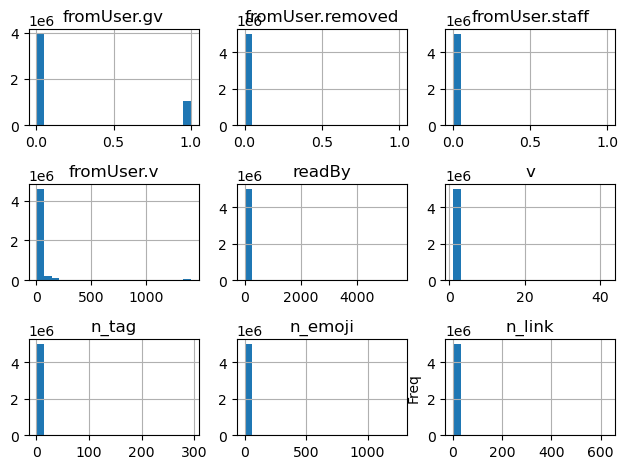

In [50]:
data_numeric.hist(bins=20)
plt.tight_layout()
plt.ylabel('Freq')
plt.show()

### All our digital columns are poorly distributed and obviously won't be of any interest to us for any particular model. 